In [97]:
# from sq_sql import DBClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [124]:
file_name = '/home/rcruz/Projects/Okay-Bokeh/nine_charts_data.csv'
# file_name = '/home/rcruz/Projects/Okay-Bokeh/nine_charts_data_2017_10_22.csv'
data = pd.read_csv(file_name)

,region_order,regioncode,period,weekend_date,cw_sales,py_sales,sales_growth,cw_traffic,py_traffic,traffic_growth,...,999,1059,-0.0567,2392,2680.000071,-0.10746271,0.4176,1206,0.449999988,1.1
0,1,26,201604,4/3/2016,670,647,0.0355,1851,1642.222266,0.127131,...,491.0,433.0,0.1339,1304.0,1434.285739,-0.090837,0.3765,502.0,0.35,1.0
1,2,36,201604,4/3/2016,428,421,0.0166,1380,1480.000025,-0.067568,...,1385.0,1270.0,0.0906,4151.0,4235.294073,-0.019903,0.3337,1440.0,0.34,1.0
2,3,34,201604,4/3/2016,1066,1012,0.0534,3527,3229.411731,0.092149,...,547.0,672.0,-0.1860,1555.0,2023.684236,-0.231599,0.3518,769.0,0.38,1.0
3,4,24,201604,4/3/2016,352,475,-0.2589,1110,1323.684227,-0.161431,...,1059.0,1157.0,-0.0847,3255.0,3517.142917,-0.074533,0.3253,1231.0,0.35,1.0
4,5,32,201604,4/3/2016,881,1008,-0.1260,3087,3288.571485,-0.061295,...,460.0,516.0,-0.1085,1412.0,1688.571457,-0.163790,0.3258,591.0,0.35,1.0


In [123]:
data['weekend_date'] = pd.to_datetime(data['weekend_date'])

,region_order,regioncode,period,weekend_date,cw_sales,py_sales,sales_growth,cw_traffic,py_traffic,traffic_growth,...,999,1059,-0.0567,2392,2680.000071,-0.10746271,0.4176,1206,0.449999988,1.1
0,1,26,201604,2016-04-03,670,647,0.0355,1851,1642.222266,0.127131,...,491.0,433.0,0.1339,1304.0,1434.285739,-0.090837,0.3765,502.0,0.35,1.0
1,2,36,201604,2016-04-03,428,421,0.0166,1380,1480.000025,-0.067568,...,1385.0,1270.0,0.0906,4151.0,4235.294073,-0.019903,0.3337,1440.0,0.34,1.0
2,3,34,201604,2016-04-03,1066,1012,0.0534,3527,3229.411731,0.092149,...,547.0,672.0,-0.1860,1555.0,2023.684236,-0.231599,0.3518,769.0,0.38,1.0
3,4,24,201604,2016-04-03,352,475,-0.2589,1110,1323.684227,-0.161431,...,1059.0,1157.0,-0.0847,3255.0,3517.142917,-0.074533,0.3253,1231.0,0.35,1.0
4,5,32,201604,2016-04-03,881,1008,-0.1260,3087,3288.571485,-0.061295,...,460.0,516.0,-0.1085,1412.0,1688.571457,-0.163790,0.3258,591.0,0.35,1.0


In [100]:
# national = data[['period', 'weekend_date', 'cw_reported_sales', 'py_actual_sales', 'cw_traffic', 'py_traffic']].groupby(['period', 'weekend_date']).sum().reset_index()
national = data[['period', 'weekend_date', 'cw_sales', 'py_sales', 'cw_traffic', 'py_traffic']].groupby(['period', 'weekend_date']).sum().reset_index()

In [101]:
national['sales_growth'] = (national['cw_sales'] - national['py_sales']) / national['py_sales']
national['traffic_growth'] = (national['cw_traffic'] - national['py_traffic']) / national['py_traffic']
national['region_order'] = 0
national['regioncode'] = 100

In [115]:
data = data[['region_order', 'regioncode', 'period', 'weekend_date', 'cw_sales', 'py_sales', 'sales_growth', 'cw_traffic', 'py_traffic', 'traffic_growth']]
national = national[['region_order', 'regioncode', 'period', 'weekend_date', 'cw_sales', 'py_sales', 'sales_growth', 'cw_traffic', 'py_traffic', 'traffic_growth']]

KeyError: "['TIV'] not in index"

In [116]:
data = data.append(national)

In [104]:
data.head()

,region_order,regioncode,period,weekend_date,cw_sales,py_sales,sales_growth,cw_traffic,py_traffic,traffic_growth
0,1,26,201604,2016-04-03,670,647,0.0355,1851,1642.222266,0.127131
1,2,36,201604,2016-04-03,428,421,0.0166,1380,1480.000025,-0.067568
2,3,34,201604,2016-04-03,1066,1012,0.0534,3527,3229.411731,0.092149
3,4,24,201604,2016-04-03,352,475,-0.2589,1110,1323.684227,-0.161431
4,5,32,201604,2016-04-03,881,1008,-0.1260,3087,3288.571485,-0.061295


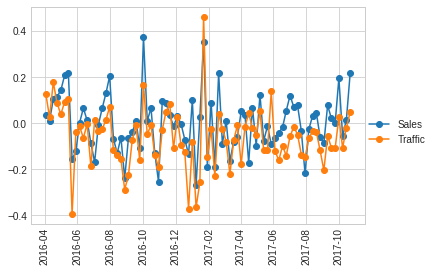

In [105]:
plt.plot(data[data['regioncode'] == 26]['weekend_date'], data[data['regioncode'] == 26]['sales_growth'], marker = 'o', label = 'Sales')
plt.plot(data[data['regioncode'] == 26]['weekend_date'], data[data['regioncode'] == 26]['traffic_growth'], marker = 'o', label = 'Traffic')
plt.legend(prop={'size': 10}, bbox_to_anchor=(1, 0.5), loc='upper left', borderaxespad=0.,)
plt.xticks(rotation=90, size = 10)
plt.show()

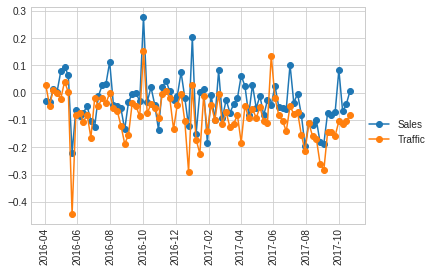

In [106]:
plt.plot(data[data['regioncode'] == 100]['weekend_date'], data[data['regioncode'] == 100]['sales_growth'], marker = 'o', label = 'Sales')
plt.plot(data[data['regioncode'] == 100]['weekend_date'], data[data['regioncode'] == 100]['traffic_growth'], marker = 'o', label = 'Traffic')
plt.legend(prop={'size': 10}, bbox_to_anchor=(1, 0.5), loc='upper left', borderaxespad=0.,)
plt.xticks(rotation=90, size = 10)
plt.show()

In [107]:
from bokeh.io import output_notebook, output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, CDSView, BooleanFilter, Legend
# from bokeh.models.widgets.tables import TableColumn
import bokeh.plotting as bp
from bokeh.models import PrintfTickFormatter

In [108]:
output_notebook()

Loading BokehJS ...

In [109]:
import datetime
data['formatted_date'] = data['weekend_date']\
.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

In [110]:
data['sales_growth'] = data['sales_growth'] * 100
data['traffic_growth'] = data['traffic_growth'] * 100
data['formatted_sales_growth'] = [str(x) + '%' for x in (data['sales_growth']).round(2)]
data['formatted_traffic_growth'] = [str(x) + '%' for x in (data['traffic_growth']).round(2)]


In [111]:
data.head()

,region_order,regioncode,period,weekend_date,cw_sales,py_sales,sales_growth,cw_traffic,py_traffic,traffic_growth,formatted_date,formatted_sales_growth,formatted_traffic_growth
0,1,26,201604,2016-04-03,670,647,3.55,1851,1642.222266,12.713123,2016-04-03,3.55%,12.71%
1,2,36,201604,2016-04-03,428,421,1.66,1380,1480.000025,-6.756758,2016-04-03,1.66%,-6.76%
2,3,34,201604,2016-04-03,1066,1012,5.34,3527,3229.411731,9.214937,2016-04-03,5.34%,9.21%
3,4,24,201604,2016-04-03,352,475,-25.89,1110,1323.684227,-16.143142,2016-04-03,-25.89%,-16.14%
4,5,32,201604,2016-04-03,881,1008,-12.60,3087,3288.571485,-6.129454,2016-04-03,-12.6%,-6.13%


In [114]:
source_24 = ColumnDataSource(data=data[data['regioncode'] == 24])
# source_26 = ColumnDataSource(data=data[data['regioncode'] == 26])
# source_32 = ColumnDataSource(data=data[data['regioncode'] == 32])
# source_34 = ColumnDataSource(data=data[data['regioncode'] == 34])
# source_36 = ColumnDataSource(data=data[data['regioncode'] == 36])
# source_42 = ColumnDataSource(data=data[data['regioncode'] == 42])
# source_44 = ColumnDataSource(data=data[data['regioncode'] == 44])
# source_48 = ColumnDataSource(data=data[data['regioncode'] == 48])

hover = HoverTool(tooltips=[
    ("date", "@formatted_date"),
    ("YOY sales growth", "@formatted_sales_growth"),
    ("YOY traffic growth", "@formatted_traffic_growth"),
    
])
regions = [[24,26,32], [34, 36,42], [44,48, None]]

grid_body = []
for region_row in regions:
    grid_row = []
    for region_number in region_row:
        if region_number is not None:
            region_name = "region " + str(region_number)
            source = ColumnDataSource(data=data[data['regioncode'] == 24])
            plot_grid = bp.figure(plot_width=500,
                                  plot_height=350,
                                  tools=[hover,'pan,wheel_zoom,box_zoom,reset'],
                                  x_axis_type="datetime",
                                  title=region_name)

            plot_grid.line(x='weekend_date',
                           y='sales_growth',
                           source=source,
                           color = 'black',
                           legend = 'sales')

            plot_grid.circle(x="weekend_date",
                             y="sales_growth",
                             size=3,
                             color='black',
                             hover_color="red",
                             source=source)

            plot_grid.line(x='weekend_date',
                           y='traffic_growth',
                           source=source,
                           color = 'red',
                           legend = 'traffic')

            plot_grid.circle(x="weekend_date",
                             y="traffic_growth",
                             size=3,
                             color='red',
                             hover_color="red",
                             source=source)
            
            plot_grid.line(x='weekend_date',
                           y='TIV',
                           source=source,
                           color = 'orange',
                           legend = 'traffic')

            plot_grid.circle(x="weekend_date",
                             y="traffic_growth",
                             size=3,
                             color='red',
                             hover_color="red",
                             source=source)

            plot_grid.yaxis[0].formatter = PrintfTickFormatter(format='%0.0f %%')
            plot_grid.yaxis.axis_label='YOY'
            plot_grid.legend.location = "top_center"
            grid_row.append(plot_grid)
        else:
            grid_row.append(None)
    grid_body.append(grid_row)
    grid_row = []

p = gridplot(grid_body)

# columns = [
#         TableColumn(field="weekend_date", title="Date", formatter=DateFormatter()),
#         TableColumn(field="sales_growth", title="sales"),
#         TableColumn(field="traffic_growth", title="traffic"),
#     ]

# data_table = DataTable(source=source_24, columns=columns, width=350, height=280)
# show(widgetbox(data_table))

# output_file('daily sales.html')
show(p)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='15720a01-34ce-4f1d-90f8-dac2a84f30bf', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='4b94669f-a1bf-4022-be54-833f35dde05a', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='6e8d1252-da43-4b7f-a11c-47c342f2fd83', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='7120916d-b255-4291-9622-726ee9b58637', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='74850e2d-3a0f-496d-8fde-d99ceb44ef55', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='977c0343-7ac8-44a7-81da-b7f829fdd934', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='aacbbdc6-410f-4565-80b2-bb29aa

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='15720a01-34ce-4f1d-90f8-dac2a84f30bf', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='4b94669f-a1bf-4022-be54-833f35dde05a', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='6e8d1252-da43-4b7f-a11c-47c342f2fd83', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='7120916d-b255-4291-9622-726ee9b58637', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='74850e2d-3a0f-496d-8fde-d99ceb44ef55', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='977c0343-7ac8-44a7-81da-b7f829fdd934', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: TIV [renderer: GlyphRenderer(id='aacbbdc6-410f-4565-80b2-bb29aa

In [53]:
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

# output_file("layout.html")

x = list(range(11))
y0 = x
y1 = [10-i for i in x]
y2 = [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in a grid layout
p = gridplot([[s1, s2], [None, s3]])

# show the results
show(p)